In [1]:
# t-SNE
import scanpy as sc

In [2]:
# 1. Load example dataset (10x Genomics PBMCs). Replace with your own file if needed.
adata = sc.datasets.pbmc3k()  # Built-in example; alternatively use sc.read_10x_h5(...) or sc.read_h5ad(...)

In [3]:
# 2. Basic preprocessing: filter, normalize, and log-transform
sc.pp.filter_cells(adata, min_genes=200)        # Remove cells with fewer than 200 detected genes
sc.pp.filter_genes(adata, min_cells=3)          # Remove genes expressed in fewer than 3 cells
sc.pp.normalize_total(adata, target_sum=1e4)    # Normalize each cell’s total counts to 10,000
sc.pp.log1p(adata)                              # Apply log(x + 1) transformation

In [4]:
# 3. Identify highly variable genes (HVGs); subset to top 2,000
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
adata = adata[:, adata.var.highly_variable]     # Keep only HVGs

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
# 4. Regress out unwanted variation and scale data （optial）
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])  # Regress out total counts and mitochondrial percentage
# sc.pp.scale(adata, max_value=10)                              # Scale each gene to unit variance, clip values > 10

In [6]:
# 5. Run PCA as a preprocessing step for t‑SNE
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [7]:
# 6. Construct neighborhood graph on PCA space
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, metric='euclidean')

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# 7. Compute t‑SNE embedding (in 2 dimensions by default)
sc.tl.tsne(adata, n_pcs=50, perplexity=30)  # You can adjust 'perplexity' as needed

In [9]:
# 8. Visualize the t‑SNE embedding, coloring by Leiden clusters (or any obs column)
#    First, run Leiden clustering if cluster labels are not already present
sc.tl.leiden(adata, resolution=0.5)

/var/folders/nw/_qyjvbs92210zt5v3kqgyx4h0000gn/T/ipykernel_585/3026188225.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


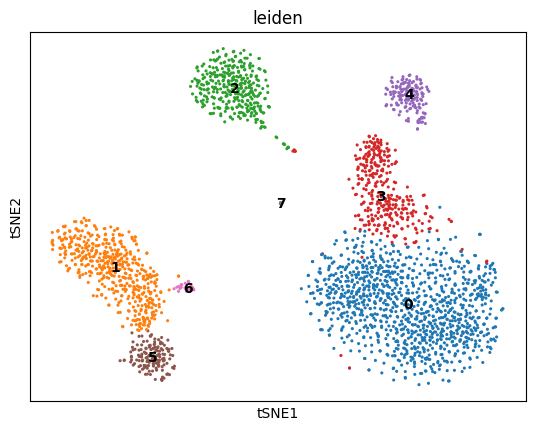

In [10]:
# 9. Plot t‑SNE, coloring cells by their Leiden cluster assignment
sc.pl.tsne(adata, color='leiden', size=20, legend_loc='on data')